<a href="https://colab.research.google.com/github/mostafa-ja/Data-Mining-fall-2023/blob/main/Data_Mining1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
tree = ET.parse('/content/post.xml')
root = tree.getroot()

In [3]:
#create a pandas dataframe from the file

# Initialize empty lists to store data
ids = []
post_types = []
ParentId = []
accepted_answer_ids = []
creation_dates = []
scores = []
view_counts = []
bodies = []
owner_user_ids = []
last_editor_user_ids = []
last_editor_display_names = []
last_edit_dates = []
last_activity_dates = []
titles = []
tags = []
answer_counts = []
comment_counts = []
favorite_counts = []
community_owned_dates = []

for post in root.findall('row'):
    ids.append(post.get('Id'))
    post_types.append(post.get('PostTypeId'))
    ParentId.append(post.get('ParentId'))
    accepted_answer_ids.append(post.get('AcceptedAnswerId'))
    creation_dates.append(post.get('CreationDate'))
    scores.append(post.get('Score'))
    view_counts.append(post.get('ViewCount'))
    bodies.append(post.get('Body'))
    owner_user_ids.append(post.get('OwnerUserId'))
    last_editor_user_ids.append(post.get('LastEditorUserId'))
    last_editor_display_names.append(post.get('LastEditorDisplayName'))
    last_edit_dates.append(post.get('LastEditDate'))
    last_activity_dates.append(post.get('LastActivityDate'))
    titles.append(post.get('Title'))
    tags.append(post.get('Tags'))
    answer_counts.append(post.get('AnswerCount'))
    comment_counts.append(post.get('CommentCount'))
    favorite_counts.append(post.get('FavoriteCount'))
    community_owned_dates.append(post.get('CommunityOwnedDate'))

# Create a DataFrame using the lists
data = {
    'id': ids,
    'PostTypeId': post_types,
    'ParentId': ParentId,
    'AcceptedAnswerId': accepted_answer_ids,
    'CreationDate': creation_dates,
    'Score': scores,
    'ViewCount': view_counts,
    'Body': bodies,
    'OwnerUserId': owner_user_ids,
    'LastEditorUserId': last_editor_user_ids,
    'LastEditorDisplayName': last_editor_display_names,
    'LastEditDate': last_edit_dates,
    'LastActivityDate': last_activity_dates,
    'Title': titles,
    'Tags': tags,
    'AnswerCount': answer_counts,
    'CommentCount': comment_counts,
    'FavoriteCount': favorite_counts,
    'CommunityOwnedDate': community_owned_dates
}

df = pd.DataFrame(data)
df.head(3)

,id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,CommunityOwnedDate
0,4,1,None,7,2008-07-31T21:42:52.667,322,21888,<p>I want to use a track-bar to change a form'...,8,451518,Rich B,2014-07-28T10:02:50.557,2014-12-20T17:18:47.807,When setting a form's opacity should I use a d...,<c#><winforms><type-conversion><opacity>,13,1,27,2012-10-31T16:42:47.213
1,6,1,None,31,2008-07-31T22:08:08.620,140,10912,<p>I have an absolutely positioned <code>div</...,9,1350209,Rich B,2014-06-26T04:57:13.750,2014-10-10T05:55:36.033,Why doesn't the percentage width child in abso...,<html><css><css3><internet-explorer-7>,5,0,7,None
2,7,2,4,None,2008-07-31T22:17:57.883,242,None,<p>An explicit cast to double isn't necessary....,9,967315,None,2012-10-14T11:50:16.703,2012-10-14T11:50:16.703,None,None,None,0,None,None


In [4]:
df.columns

Index(['id', 'PostTypeId', 'ParentId', 'AcceptedAnswerId', 'CreationDate',
       'Score', 'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId',
       'LastEditorDisplayName', 'LastEditDate', 'LastActivityDate', 'Title',
       'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount',
       'CommunityOwnedDate'],
      dtype='object')

In [5]:
df.drop(columns=['AcceptedAnswerId','OwnerUserId', 'LastEditorUserId', 'LastEditorDisplayName','LastEditDate', 'LastActivityDate','CommunityOwnedDate'], inplace=True)

In [6]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

In [7]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)


id                 0
PostTypeId         0
ParentId          71
CreationDate       0
Score              0
ViewCount        150
Body               0
Title            150
Tags             150
AnswerCount      150
CommentCount       0
FavoriteCount    159
dtype: int64


# Question Analysis

PostTypeId field :

1=Questions

2=Answers

In [8]:
df_question = df[df['PostTypeId'] == '1'].copy()
df_question.drop(columns=['PostTypeId','ParentId'], inplace=True)

In [9]:
df_question['BodyLength']  = df_question['Body'].str.len()
df_question['TitleLength']  = df_question['Title'].str.len()

In [10]:
columns_to_convert = ['id','Score', 'ViewCount', 'AnswerCount', 'CommentCount', 'FavoriteCount']
for col in columns_to_convert:
    df_question[col] = df_question[col].fillna(0).astype(int)

In [11]:
def clean_tags(tags_string):
    tags_string = ' '.join(tag.strip('<>') for tag in tags_string.split('>'))
    cleaned_tags = ' '.join(tag for tag in tags_string.split('<'))
    return cleaned_tags.replace('-', ' ')

# Apply the function directly to create the 'Cleaned_Tags' column
df_question['Cleaned_Tags'] = df_question['Tags'].apply(clean_tags)
df_question.drop(columns=['Tags'], inplace=True)
df_question['Cleaned_Tags']

0       c# winforms type conversion opacity 
1         html css css3 internet explorer 7 
3                          c# .net datetime 
4                               c# datediff 
6      html browser timezone timezoneoffset 
                       ...                  
207              python osx fonts photoshop 
208                       .net web services 
211                c# winforms data binding 
214                python windows image pdf 
216                ruby on rails ruby crash 
Name: Cleaned_Tags, Length: 71, dtype: object

In [12]:
df_question['Cleaned_Tags']

0       c# winforms type conversion opacity 
1         html css css3 internet explorer 7 
3                          c# .net datetime 
4                               c# datediff 
6      html browser timezone timezoneoffset 
                       ...                  
207              python osx fonts photoshop 
208                       .net web services 
211                c# winforms data binding 
214                python windows image pdf 
216                ruby on rails ruby crash 
Name: Cleaned_Tags, Length: 71, dtype: object

In [13]:
# Function to count words in a sentence
def count_words(sentence):
    return len(sentence.split())

# Calculate the length of each row in the 'TextColumn'
df_question['#tags'] = df_question['Cleaned_Tags'].apply(count_words)
df_question['#tags']

0      5
1      6
3      3
4      2
6      4
      ..
207    4
208    3
211    4
214    4
216    5
Name: #tags, Length: 71, dtype: int64

In [14]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def similarity(query, document):

    result = []
    m = len(query)
    for i in range(m) :
        query_tokens = word_tokenize(query[i])
        document_tokens = word_tokenize(document[i])
        filtered_query = [ps.stem(w) for w in query_tokens if not w.lower() in stop_words]
        filtered_document = [ps.stem(w) for w in document_tokens if not w.lower() in stop_words]

        intersection = set(filtered_query).intersection(set(filtered_document))
        #union = set(filtered_query[i]).union(set(filtered_document[i]))
        result.append(int(len(intersection)/len(set(filtered_query))*100))
    return result

In [15]:
df_question['sim_Tags_Body'] = similarity(df_question['Cleaned_Tags'].str.lower().tolist(), df_question['Body'].str.lower().tolist())

In [16]:
df_question.columns

Index(['id', 'CreationDate', 'Score', 'ViewCount', 'Body', 'Title',
       'AnswerCount', 'CommentCount', 'FavoriteCount', 'BodyLength',
       'TitleLength', 'Cleaned_Tags', '#tags', 'sim_Tags_Body'],
      dtype='object')

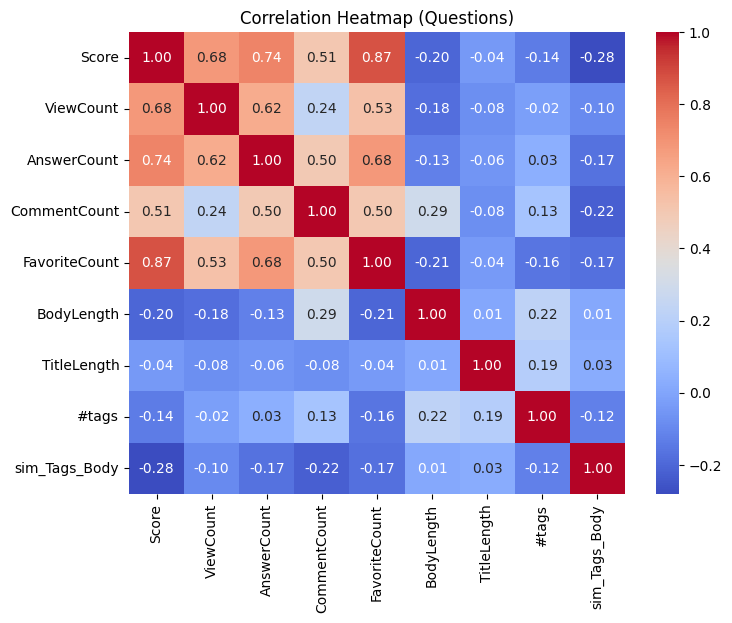

In [35]:

# Drop the column to ignore
column_to_ignore = ['id', 'CreationDate','Body','Title','Cleaned_Tags']
numeric_df_question = df_question.drop(columns=column_to_ignore)

# Calculate correlation matrix
correlation_matrix = numeric_df_question.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Questions)')
plt.show()

**IMPORTANT** : The diagonal plots in a Seaborn pairplot show the distribution of the values within each column. By default, Seaborn plots histograms for numerical columns and bar plots for categorical columns on the diagonal.

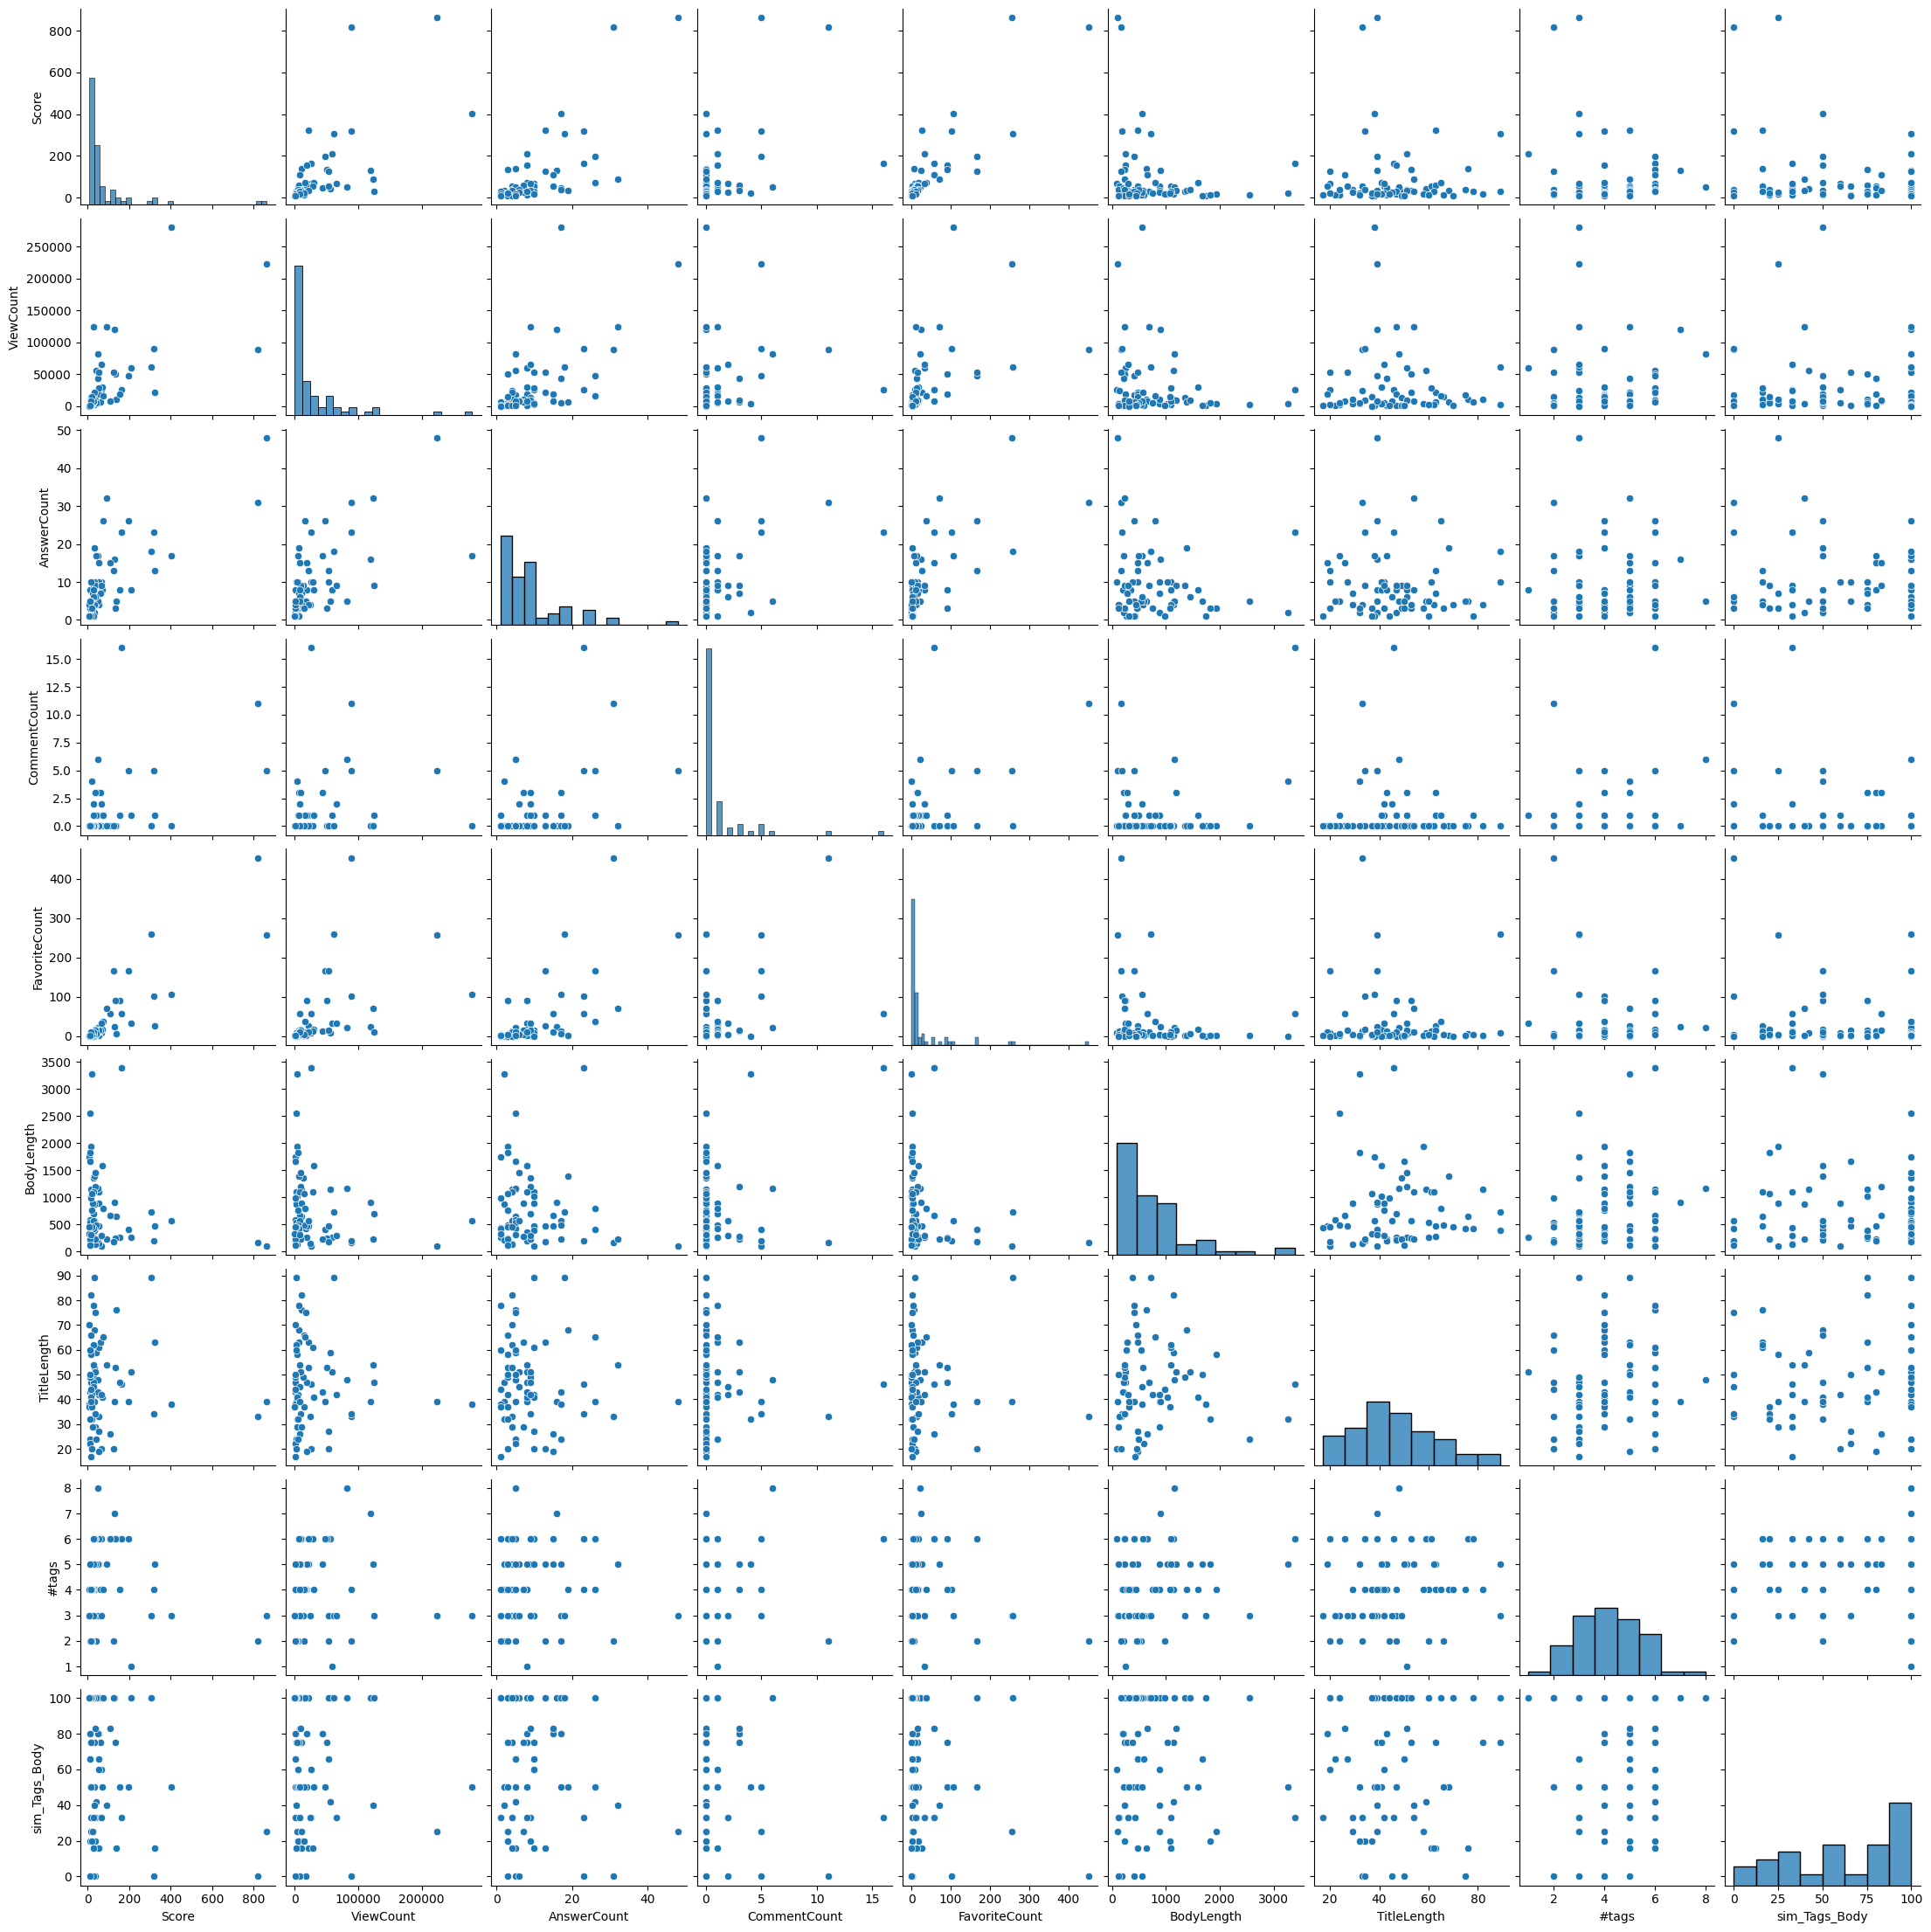

In [36]:
# Plotting pairplot to show correlations between all columns
sns.pairplot(numeric_df_question)
plt.show()

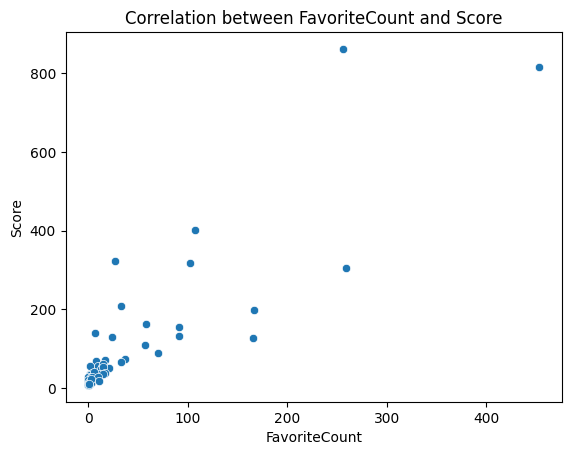

In [50]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x=df_question['FavoriteCount'], y=df_question['Score'], data=df)
plt.title('Correlation between FavoriteCount and Score')
plt.xlabel('FavoriteCount')
plt.ylabel('Score')
plt.show()

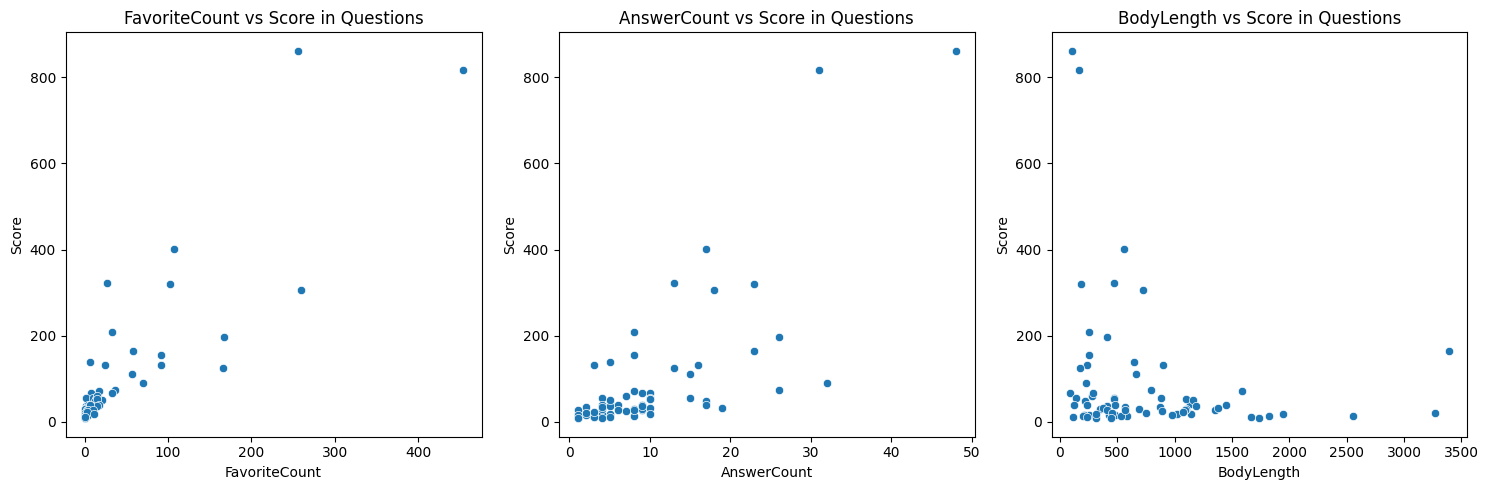

In [51]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Column1 against other columns
for i, col in enumerate(['FavoriteCount', 'AnswerCount', 'BodyLength']):
    sns.scatterplot(x=col, y='Score', data=df_question, ax=axes[i])
    axes[i].set_title(f'{col} vs Score in Questions')

plt.tight_layout()
plt.show()

# Answer Analysis

In [18]:
df_answer = df[df['PostTypeId'] == '2'].copy()
df_answer.columns

Index(['id', 'PostTypeId', 'ParentId', 'CreationDate', 'Score', 'ViewCount',
       'Body', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'FavoriteCount'],
      dtype='object')

In [19]:
df_answer.drop(columns=['PostTypeId','ViewCount','Title','Tags','AnswerCount','FavoriteCount'], inplace=True)

In [20]:
columns_to_convert = ['id','ParentId','Score','CommentCount']
for col in columns_to_convert:
    df_answer[col] = df_answer[col].fillna(0).astype(int)

In [21]:
df_answer['BodyLength']  = df_answer['Body'].str.len()

In [22]:
#Answers which contain links and sorce codes
df_answer['containLink'] = df_answer['Body'].str.contains('<a href=') * 1
df_answer['containCode'] = df_answer['Body'].str.contains('<code>') * 1

In [23]:
df_answer.columns

Index(['id', 'ParentId', 'CreationDate', 'Score', 'Body', 'CommentCount',
       'BodyLength', 'containLink', 'containCode'],
      dtype='object')

In [24]:
# Merge based on 'ID' in df1 and 'ParentId' in df2
merged_df = pd.merge(df_answer, df_question, left_on='ParentId', right_on='id', how='inner', suffixes=('_A', '_Q'))

merged_df.head(3)

,id_A,ParentId,CreationDate_A,Score_A,Body_A,CommentCount_A,BodyLength_A,containLink,containCode,id_Q,...,Body_Q,Title,AnswerCount,CommentCount_Q,FavoriteCount,BodyLength_Q,TitleLength,Cleaned_Tags,#tags,sim_Tags_Body
0,7,4,2008-07-31 22:17:57.883,242,<p>An explicit cast to double isn't necessary....,0,331,0,1,4,...,<p>I want to use a track-bar to change a form'...,When setting a form's opacity should I use a d...,13,1,27,472,63,c# winforms type conversion opacity,5,16
1,78,4,2008-08-01 13:53:06.357,27,<p>It sounds like <code>this.Opacity</code> is...,0,141,0,1,4,...,<p>I want to use a track-bar to change a form'...,When setting a form's opacity should I use a d...,13,1,27,472,63,c# winforms type conversion opacity,5,16
2,86,4,2008-08-01 14:23:28.087,61,<p>A more generic answer for the generic quest...,0,472,0,0,4,...,<p>I want to use a track-bar to change a form'...,When setting a form's opacity should I use a d...,13,1,27,472,63,c# winforms type conversion opacity,5,16


In [25]:
merged_df['timeDiffrence'] = (merged_df['CreationDate_A'] - merged_df['CreationDate_Q']).dt.total_seconds() / 60 / 60 #based on hours

In [26]:
#merged_df['sim_Tags_BodyA'] = similarity(merged_df['Cleaned_Tags'].str.lower().tolist(), merged_df['Body_A'].str.lower().tolist())

In [27]:
merged_df['sim_Q_A'] = similarity(merged_df['Body_Q'].str.lower().tolist(), merged_df['Body_A'].str.lower().tolist())

In [28]:
merged_df['Body_Q'][0]

"<p>I want to use a track-bar to change a form's opacity.</p>\n\n<p>This is my code:</p>\n\n<pre><code>decimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n</code></pre>\n\n<p>When I try to build it, I get this error:</p>\n\n<blockquote>\n  <p>Cannot implicitly convert type 'decimal' to 'double'.</p>\n</blockquote>\n\n<p>I tried making <code>trans</code> a <code>double</code>, but then the control doesn't work. This code has worked fine for me in VB.NET in the past. </p>\n"

In [29]:
merged_df['Body_A'][0]

"<p>An explicit cast to double isn't necessary.</p>\n\n<pre><code>double trans = (double)trackBar1.Value / 5000.0;\n</code></pre>\n\n<p>Identifying the constant as <code>5000.0</code> (or as <code>5000d</code>) is sufficient:</p>\n\n<pre><code>double trans = trackBar1.Value / 5000.0;\ndouble trans = trackBar1.Value / 5000d;\n</code></pre>\n"

In [30]:
merged_df['sim_Q_A']

0      34
1      26
2      23
3      46
4      50
       ..
145    24
146    18
147    21
148    22
149     9
Name: sim_Q_A, Length: 150, dtype: int64

In [31]:
merged_df.columns

Index(['id_A', 'ParentId', 'CreationDate_A', 'Score_A', 'Body_A',
       'CommentCount_A', 'BodyLength_A', 'containLink', 'containCode', 'id_Q',
       'CreationDate_Q', 'Score_Q', 'ViewCount', 'Body_Q', 'Title',
       'AnswerCount', 'CommentCount_Q', 'FavoriteCount', 'BodyLength_Q',
       'TitleLength', 'Cleaned_Tags', '#tags', 'sim_Tags_Body',
       'timeDiffrence', 'sim_Q_A'],
      dtype='object')

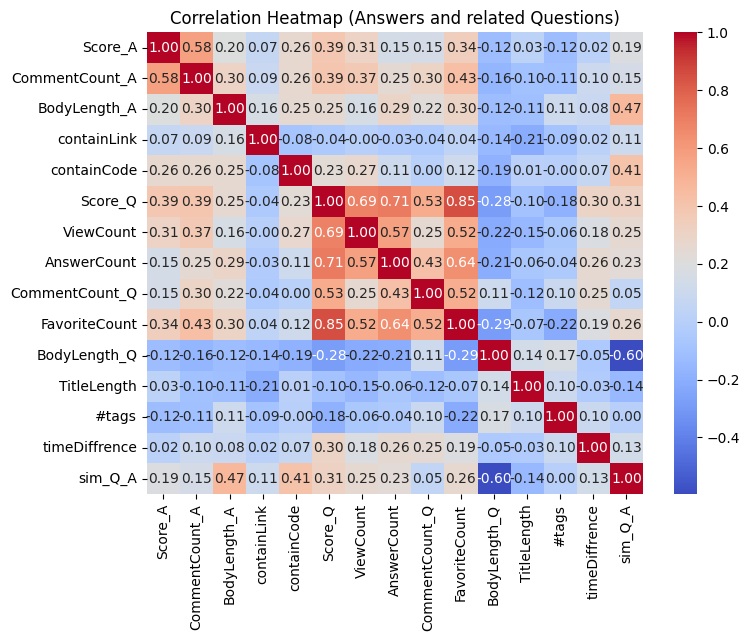

In [33]:
numeric_merged_df= merged_df.drop(columns=['id_A', 'ParentId', 'CreationDate_A','Body_A','id_Q',
       'CreationDate_Q','Body_Q', 'Title','Cleaned_Tags','sim_Tags_Body'])

# Calculate correlation matrix
correlation_matrix = numeric_merged_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Answers and related Questions)')
plt.show()

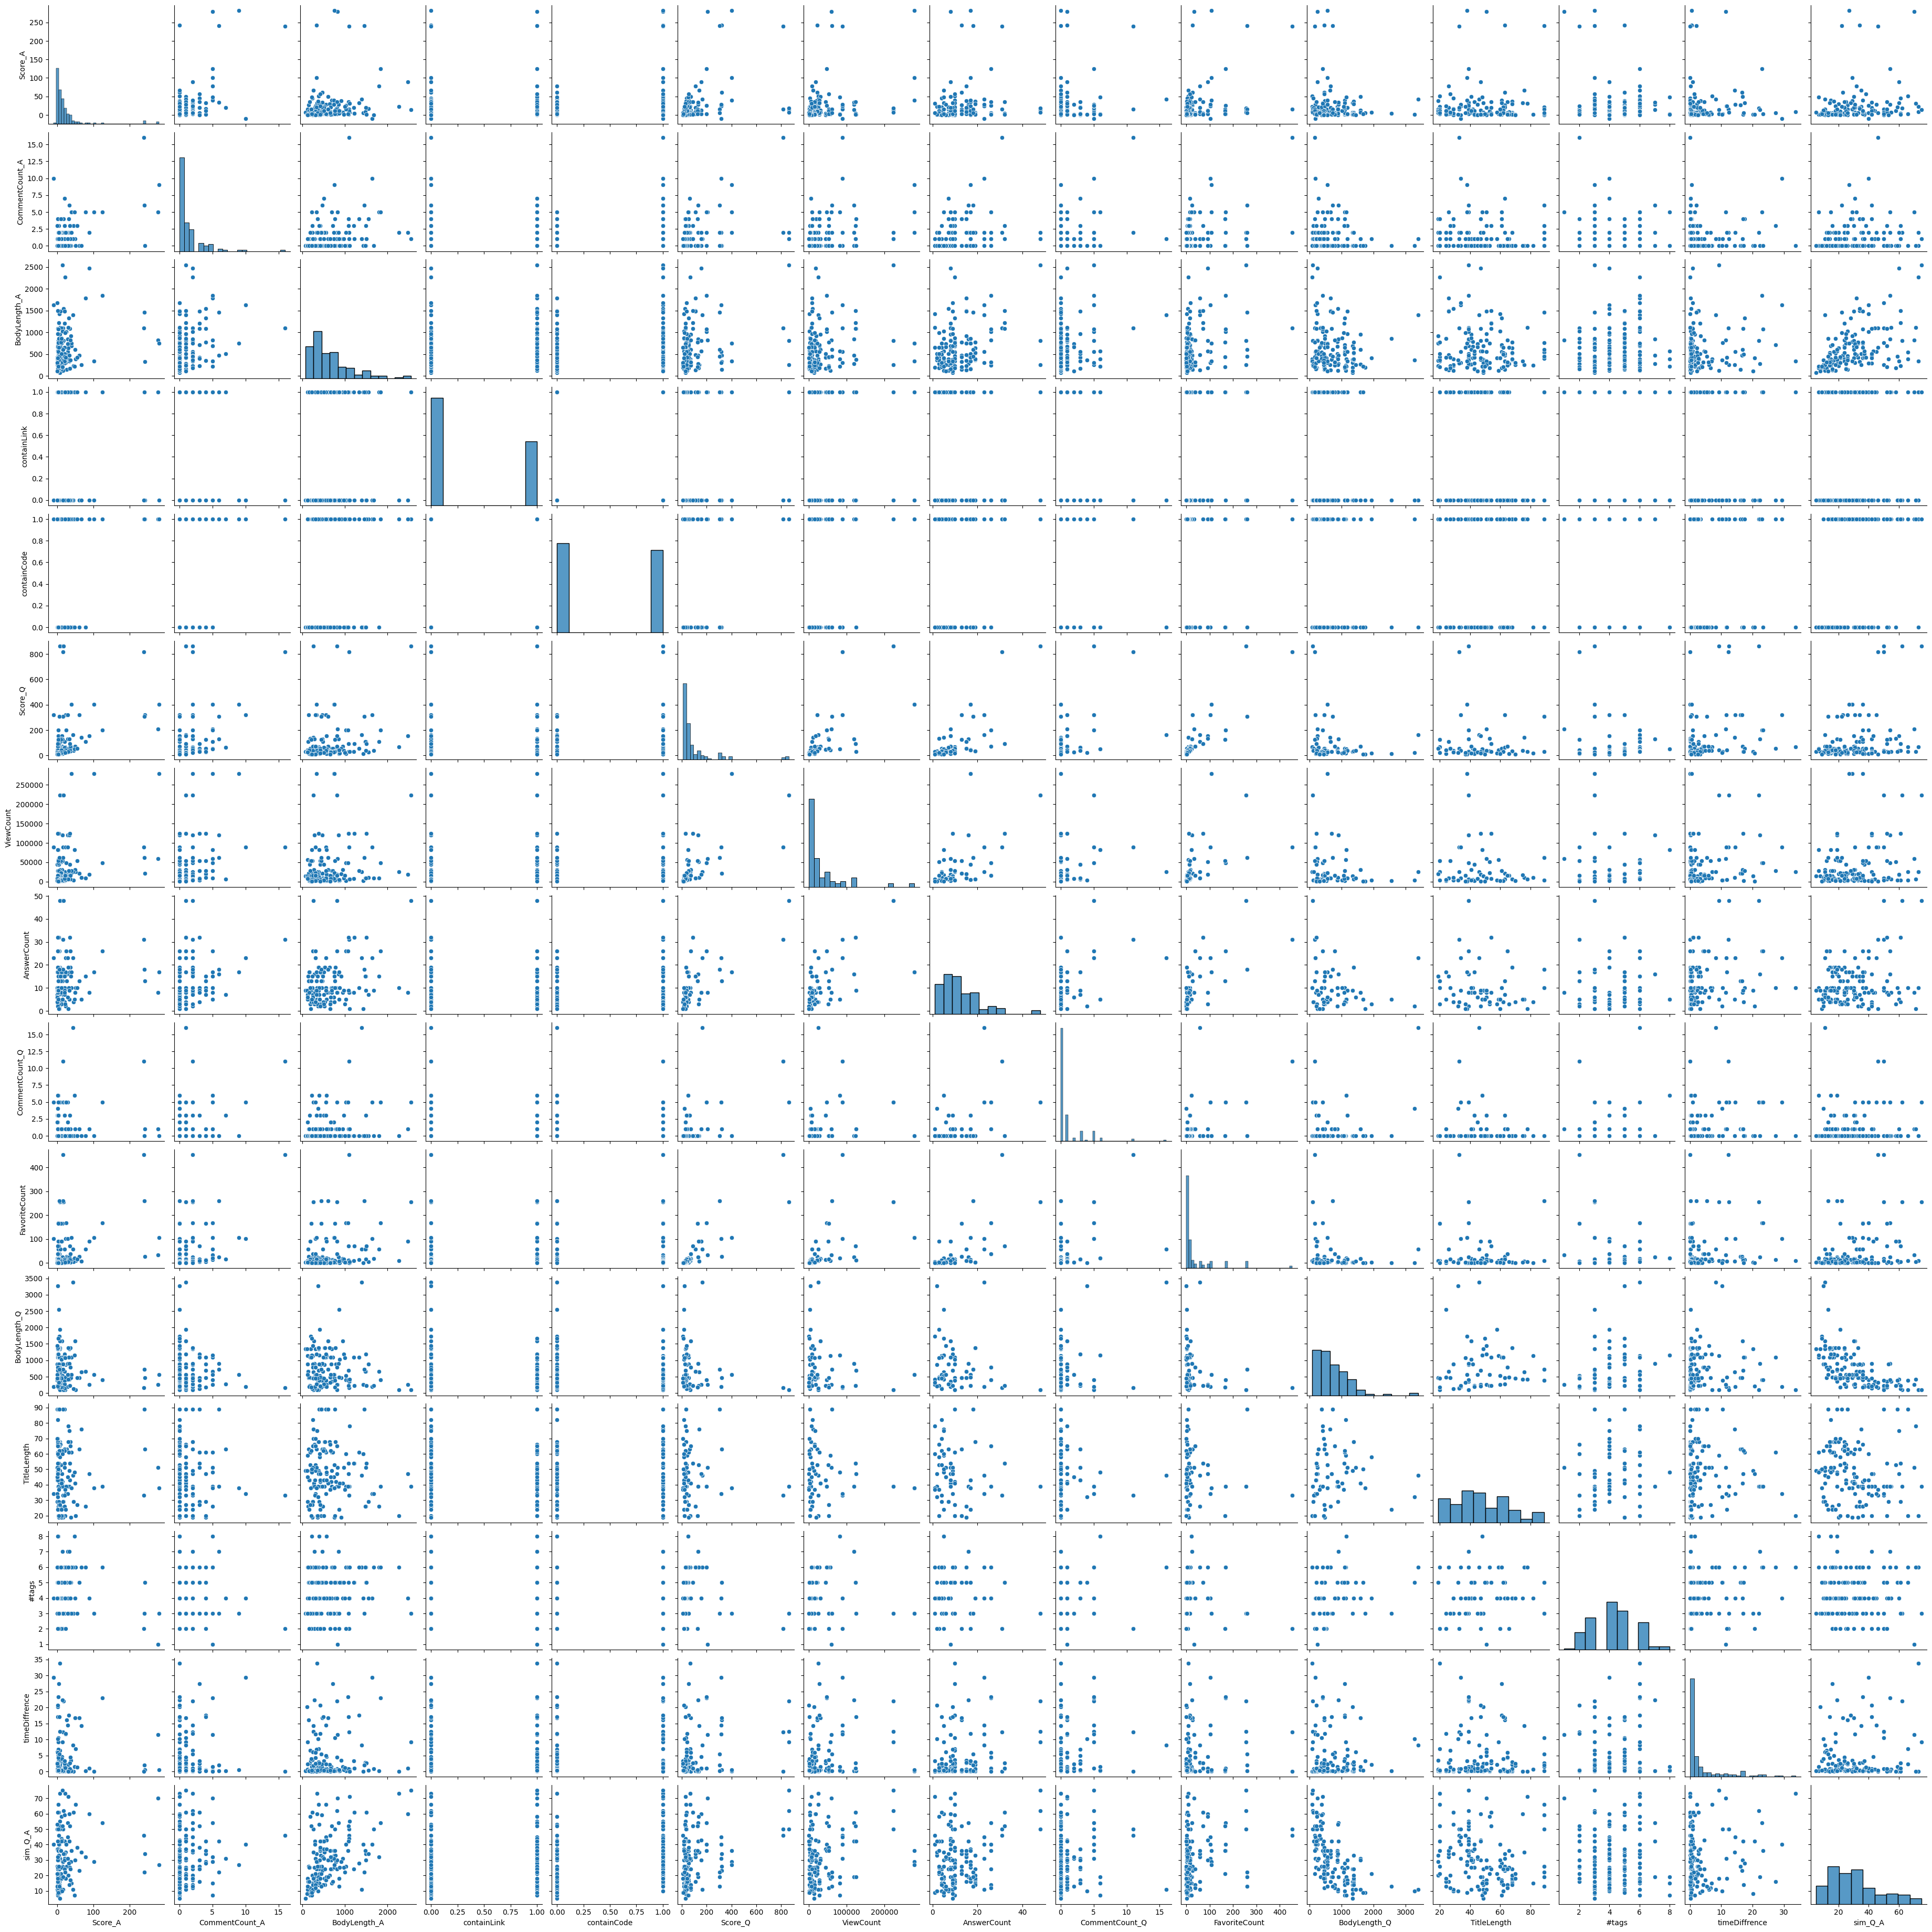

In [52]:
# Plotting pairplot to show correlations between all columns
sns.pairplot(numeric_merged_df)
plt.show()

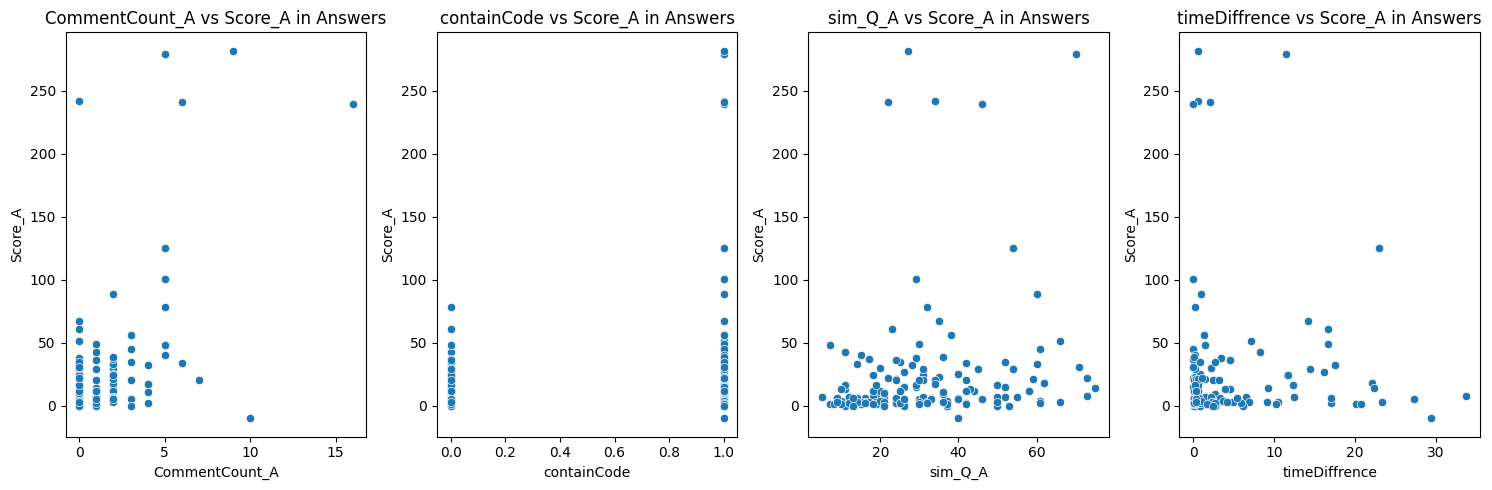

In [55]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot Column1 against other columns
for i, col in enumerate(['CommentCount_A', 'containCode', 'sim_Q_A','timeDiffrence']):
    sns.scatterplot(x=col, y='Score_A', data=numeric_merged_df, ax=axes[i])
    axes[i].set_title(f'{col} vs Score_A in Answers')

plt.tight_layout()
plt.show()

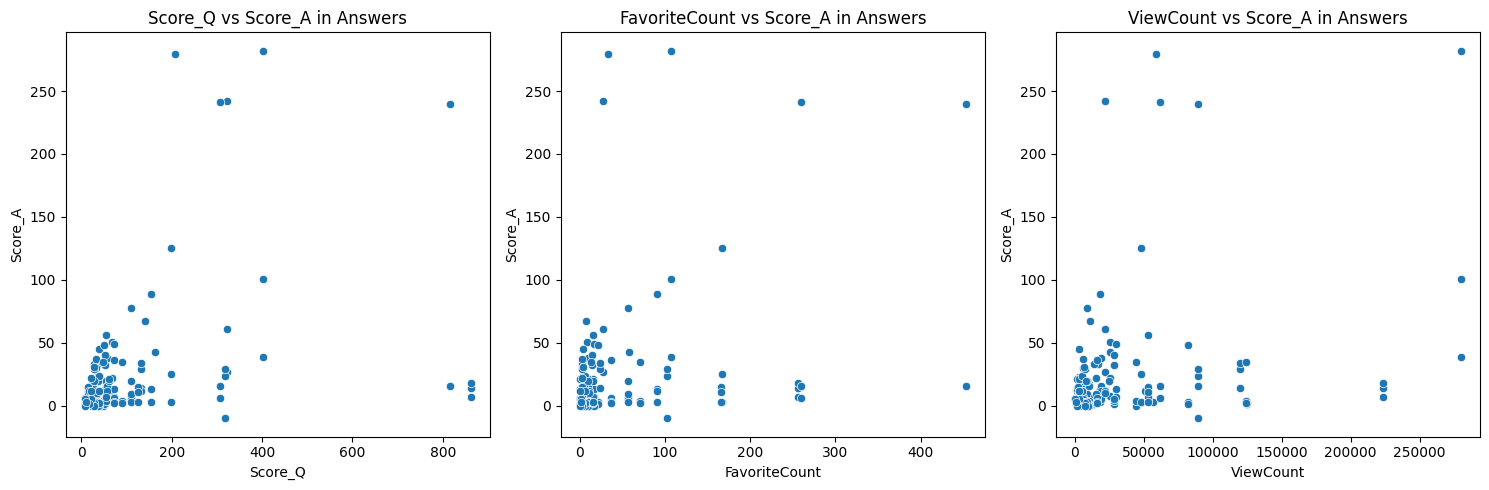

In [56]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Column1 against other columns
for i, col in enumerate(['Score_Q', 'FavoriteCount', 'ViewCount']):
    sns.scatterplot(x=col, y='Score_A', data=numeric_merged_df, ax=axes[i])
    axes[i].set_title(f'{col} vs Score_A in Answers')

plt.tight_layout()
plt.show()